<a href="https://colab.research.google.com/github/KishoreAnalyticsLab/Walmart_CaseStudy/blob/main/Walmart_Businesscase_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

##About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

##Problem Statement
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

# Details on the dataset
*   User_ID: User ID
*   Product_ID: Product ID
*   Gender: Sex of User
*   Age: Age in bins
*   Occupation: Occupation
*   City_Category: Category of the City (A,B,C)
*   StayInCurrentCityYears: Number of years stay in current city
*   Marital_Status: Marital Status
*   ProductCategory: Product Category
*   Purchase: Purchase Amount

In [3]:
#reading the dataset
df = pd.read_csv('/content/drive/MyDrive/walmart_data.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


#Basic Analysis

In [4]:
#Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
  df.shape #Finding the shape of the given dataset

(550068, 10)

We can observe few important information.
1. Non-Null counts of the each columns, there is no null values in the dataset. We will also cross check it later.
2. Total **550068** rows and **10** columns of data are present in this dataset.
3. We can notice the **Product_ID, Age, Occupation, Stay_In_Current_City_Years, Marital_Status** seems to have the wrong datatype. We have to further analysis to find out why.!  






In [6]:
  #Checking the null values of the dataset
  df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


*There* is **no** null values in any columns of the *dataset*

In [7]:
#Checking the datatypes of all the column in the given dataset
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


Observation on the '**Datatypes**' of each column:
We can see few columns does not have appropriate datatype
*   **'Occupation'** column is mentioned as '**integer**' datatype, but it is categorical column. Since it is mentioned in the solution approach document that Occupation is masked occupation and so it cannot be no. of years in the career.
*   **'Stay_In_Current_City_Years** are mentioned as '**object**' datatype but it suppose to be '**integer**' since it is a continuous column.
*   **'Product_Category and 'Marital_Status'** is mentioned as '**int**' datatype but it suppose to be 'object' since it is a categorical column.

Let's further work on the data and see if we need to change the datatypes


In [8]:
#Observing the unique values of all the columns mentioned above for change of datatype.

print(f'Unique values of Occupation - {set(df.Occupation.unique())}') #it shouldn't be an integer, since it is category
print(f'Unique values of Stay_In_Current_City - {df.Stay_In_Current_City_Years.unique()}')
print(f'Unique values of Marital_Status - {df.Marital_Status.unique()}')
print(f'Unique values of Product_Category - {set(df.Product_Category.unique())}')

Unique values of Occupation - {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Unique values of Stay_In_Current_City - ['2' '4+' '3' '1' '0']
Unique values of Marital_Status - [0 1]
Unique values of Product_Category - {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}


*   '**Occupation**' - Since occupation is a categorical column, we will change the datatype to '**Object**'.
*   **'Stay_In_Current_City_Years'** - We dont have to change the datatype as integer since it is categorical column itself. **No changes**
*   '**Marital_Status**' - Since Marital_Status is a categorical column, we will change the datatype to '**Object**'
*   **'Product_Category'** - Since Product_Category is a categorical column, we will change the datatype to '**Object**'



In [9]:
#Changing the datatypes
df["User_ID"] = df["User_ID"].astype('object')
df["Occupation"] = df["Occupation"].astype('object')
df["Marital_Status"] = df["Marital_Status"].astype('object')
df["Product_Category"] = df["Product_Category"].astype('object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


Now, we can observe that the changes we made in the datatype are reflected in the dataframe

In [11]:
#To find the number of unique values in the each columns
def uniquevalues(dataframe):
  for i in dataframe.columns:
    print(f'No. of unique values in {i} ---> {dataframe[i].nunique()}')
uniquevalues(df)

No. of unique values in User_ID ---> 5891
No. of unique values in Product_ID ---> 3631
No. of unique values in Gender ---> 2
No. of unique values in Age ---> 7
No. of unique values in Occupation ---> 21
No. of unique values in City_Category ---> 3
No. of unique values in Stay_In_Current_City_Years ---> 5
No. of unique values in Marital_Status ---> 2
No. of unique values in Product_Category ---> 20
No. of unique values in Purchase ---> 18105


From the above code, we can observe the **number of unique values** present in each columns.

**Insights:**
*   All these orders were placed by the total of **5891** unique customers includes both **Male** and **Female**. Here assuming that this is the sample dataset not the population dataset and which has orders placed by 5891 users.
*   Customers purchased **3631** different products(**Product_ID**) from the **20** unique **Product_Category**
*   Our customers belongs to **21** different occupation(**Occupation**) in **3** different city(**City_Category**)


In [12]:
#We calculated the value counts of all the categorical attributes.
df1 = df.copy()
exclude_columns = ['User_ID', 'Product_ID', 'Purchase']

def value_counts(x):
  for column in [col for col in df1.columns if col not in exclude_columns]:
    print(f'The Value Counts of {df1.groupby([column]).User_ID.count().sort_values(ascending = False).head(7)} \n\n')
  return 0
value_counts(df1)

The Value Counts of Gender
M    414259
F    135809
Name: User_ID, dtype: int64 


The Value Counts of Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: User_ID, dtype: int64 


The Value Counts of Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
Name: User_ID, dtype: int64 


The Value Counts of City_Category
B    231173
C    171175
A    147720
Name: User_ID, dtype: int64 


The Value Counts of Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: User_ID, dtype: int64 


The Value Counts of Marital_Status
0    324731
1    225337
Name: User_ID, dtype: int64 


The Value Counts of Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
Name: User_ID, dtype: int64 




0

Calculated the **value_counts** of each column. Achieved by grouping by each categorical column and find the no. of unique counts of user_id associated with that column. Will reuse this in the later sections

**Observations:**

1.   The count of **Male** population seems to be **higher than** the **female** population. Gender population in the dataset: **Male - 414259** and **Female - 135809**
1.   People in the age group of **26 to 35** have made highest number of purchases. Most of the purchases comes from **26 to 45** age group.
1.   **Top 7 cities** who made maximum purchases can be observed from the above result.
2.   People who are **single** made **more** purchases than people who are **married**
2.   People who **recently moved** (less than **3 years**) to their current city have made **more purchases** than who stays in the current city for **longer**.
2.   Most of the sales happened in these **Product Categories - 5, 1, 8**

In [13]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


**Insights on the continuous variables: Purchase amount**
1.   **Mean Purchase amount** of all the population is **9263.96**
1.   **Mininum Purchase amount** of the single purchase made among the population is **12.00**
2.   **Maximum Purchase amount** of the single purchase made among the population is **23961.00**
2.   **Median Purchase amount** of the single purchase made among the population is **8047.00** Mean and Median varies roughly by **1200**


<Axes: ylabel='Purchase'>

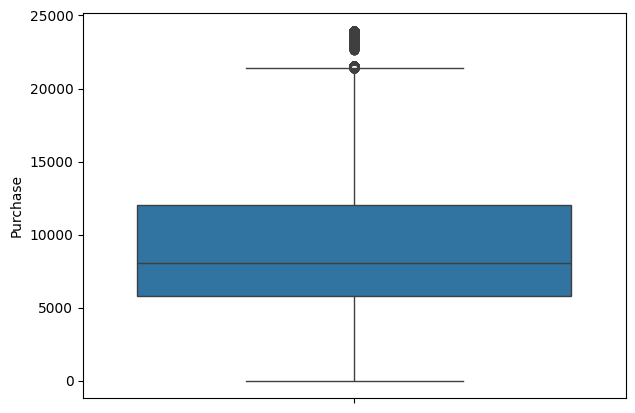

In [14]:
#checking the outliers in the Purchase amount column
plt.figure(figsize = (7,5))
sns.boxplot(data = df, y = df['Purchase'])

In [15]:
Q3= 12054.00
Q1 = 5823.00
IQR = Q3 - Q1
Upper_whisk =  Q3 + 1.5*IQR
print(f'Upper Whisk - {Upper_whisk}')
Outliers = df['Purchase'] > Upper_whisk
Outliers.value_counts()

Upper Whisk - 21400.5


,count
Purchase,
False,547391
True,2677


Number of outliers found in the Purchase column are **2677** rows/values.

The Upper whisk for the purchase column is **21400**.5. All amount lies above the upperwhisk are the **outliers**. In my analysis, I am not gonna remove the outliers because i think they are significant and the amount they contribute is also important for the analysis. Lets analysis it further on this.

In [16]:
Outliers.value_counts(normalize=True)

,proportion
Purchase,
False,0.995133
True,0.004867


Percentage of **outlier** population in the whole population in the dataset -  **close to 2 %**

In [17]:
#Creating dataframe for the outliers and normal population
outlier_df = df[df['Purchase'] > 21400.5]
normal_df = df[df['Purchase'] < 21400.5]

In [18]:
outlier_amount = outlier_df['Purchase'].sum()
normal_amount = normal_df['Purchase'].sum()
purchase_amount = df['Purchase'].sum()
print(f'Percentage of amount spend by outliers in the whole population - {round((outlier_amount/purchase_amount) * 100,2)}%')
print(f'Percentage of amount spend by general people in the whole population - {round((normal_amount/purchase_amount) * 100,2)}%')

Percentage of amount spend by outliers in the whole population - 1.22%
Percentage of amount spend by general people in the whole population - 98.78%


Observation:
1.   Percentage of amount spend by outliers in the whole population - **1.22%**
1.   Percentage of amount spend by general people in the whole population - **98.78%**

Above is the percentage of amount spent by each population in the **total purchase amount.**


In [19]:
#population count take from the previous steps
general_pop = 547391
outlier_pop = 2677
print(f'Average amount spend by outliers - {(outlier_amount/outlier_pop)}')
print(f'Average amount spend by general people - {(normal_amount/general_pop)}')

Average amount spend by outliers - 23238.39223010833
Average amount spend by general people - 9195.62719518589


We can observe that the **average amount** spend by the outliers is **significantly higher** than the **general** population. This is the average amount calculated among their own population not with whole population.

We will further investigate on this to see if we get useful insights

In [20]:
#Find proportion of male and female in outlier population

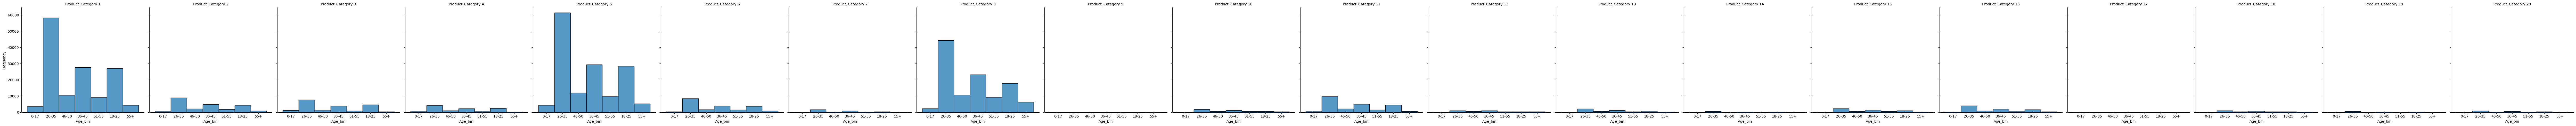

In [21]:
import seaborn as sns

#Created a facet grid for age distribution by product
g = sns.FacetGrid(df, col="Product_Category", height=5, aspect=1)
g.map(sns.histplot, "Age", bins=5, kde=False)

g.set_axis_labels("Age_bin", "Frequency")
g.set_titles(col_template="Product_Category {col_name}")
plt.show()


In [22]:
df.groupby(['Product_Category'])['User_ID'].count().sort_values(ascending = False).head(10)

,User_ID
Product_Category,
5,150933
1,140378
8,113925
11,24287
2,23864
6,20466
3,20213
4,11753
16,9828


Observation:
1.   As we can see from above plots, few **Product_Category** are having very low volume(less than 5000) of orders. We cannot compute much from them.
Those **Product_Category** are: 7, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20
2.   Top 5 Product_Categories are: 5, 1, 8, 11, 2. We can also observe that huge amount of orders placed for Product_categories: 5, 1, 8. After that, there is huge drop in volumn.
3.   For all **Product_Category** except the ones with less volumn: Most of the  orders come from people who are in **25-45** age group. In that, **26-35** age bucket **topped**.



In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


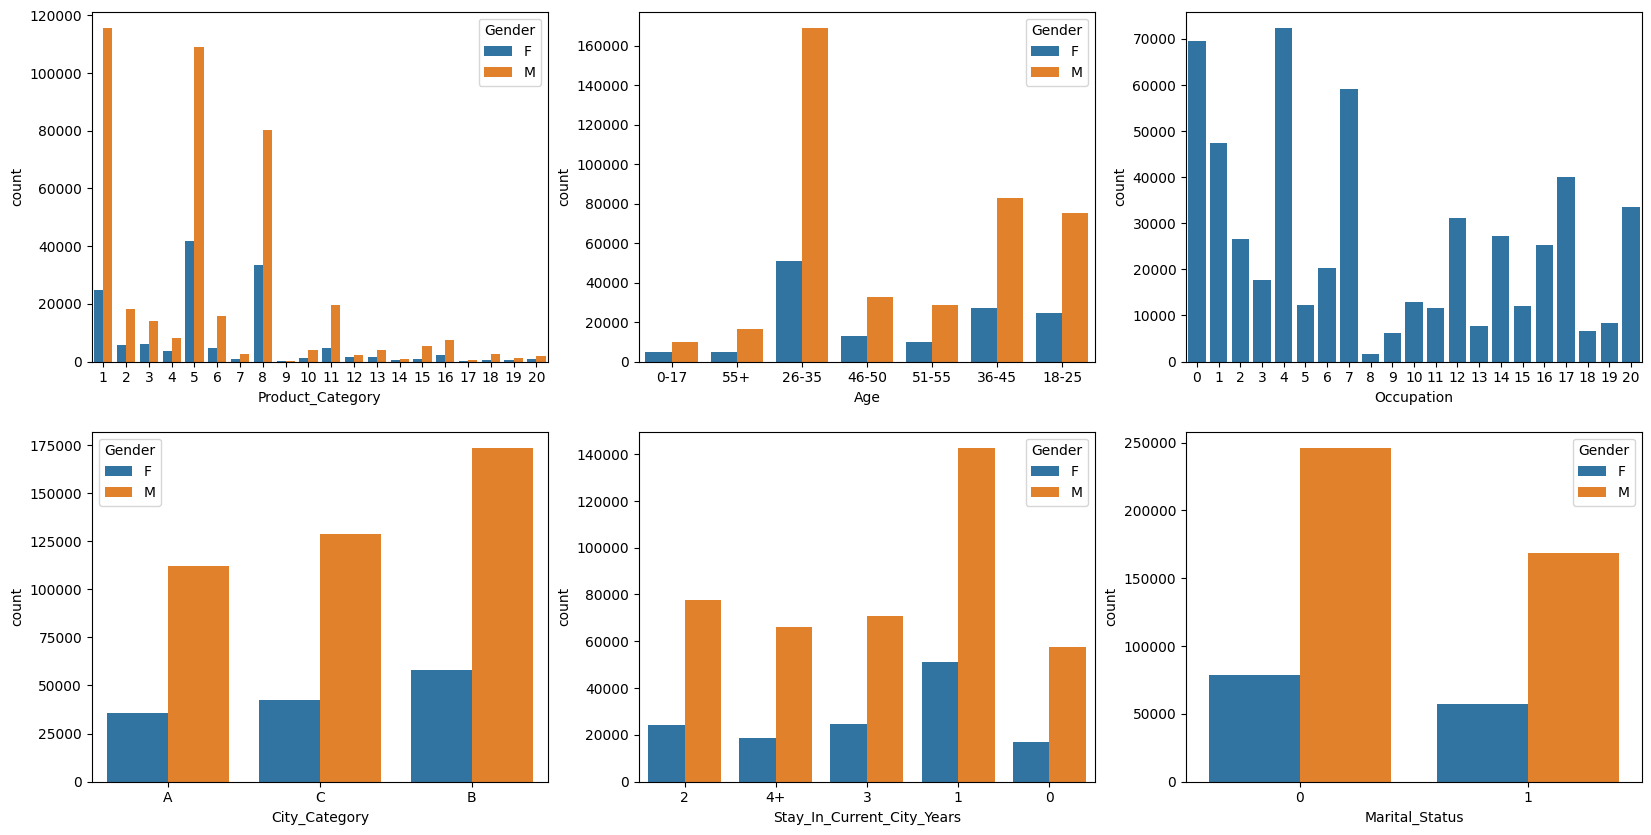

In [24]:
## GENDER BASED ANALYSIS
#Are there preferred product categories for different genders?


plt.figure(figsize = (20,10))

plt.subplot(2,3,1)
sns.countplot(data = df, x = df['Product_Category'], hue = df['Gender'] )

plt.subplot(2,3,2)
sns.countplot(data = df, x = 'Age', hue = 'Gender')

plt.subplot(2,3,3)
sns.countplot(data = df, x = 'Occupation') #

plt.subplot(2,3,4)
sns.countplot(data = df, x = 'City_Category' , hue = 'Gender') #

plt.subplot(2,3,5)
sns.countplot(data = df, x = 'Stay_In_Current_City_Years', hue = 'Gender') #, hue = 'City_Category

plt.subplot(2,3,6)
sns.countplot(data = df, x = 'Marital_Status', hue = 'Gender') #, hue = 'City_Category

plt.show()

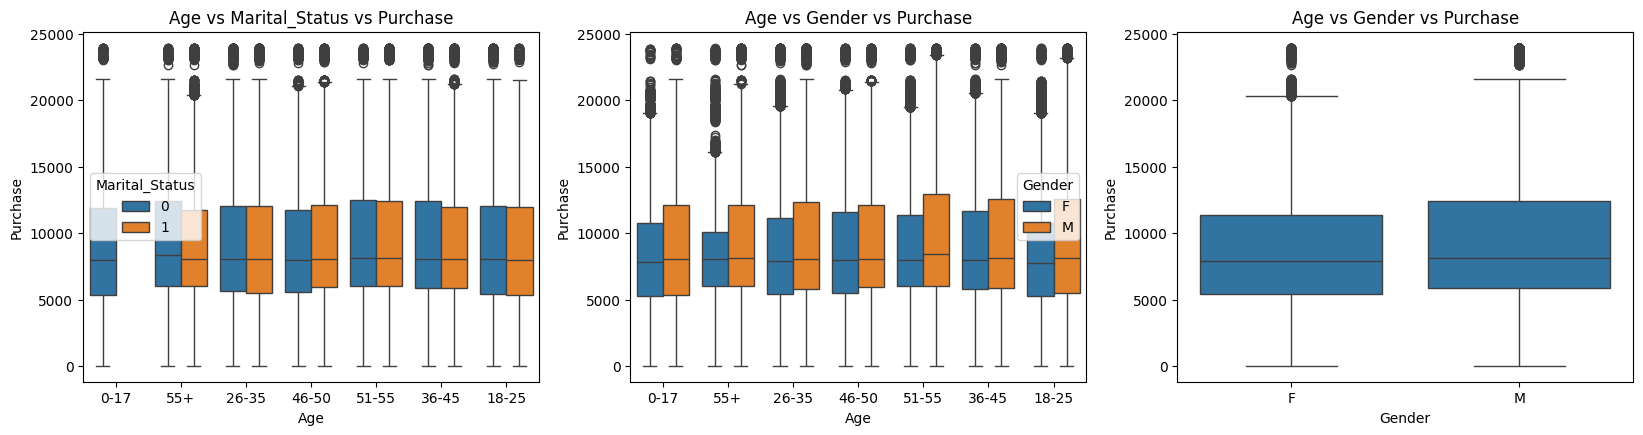

In [25]:
plt.figure(figsize = (20,10))

plt.subplot(2,3,1)
sns.boxplot(data = df, x = 'Age', y ='Purchase', hue = 'Marital_Status')
plt.title('Age vs Marital_Status vs Purchase')

plt.subplot(2,3,2)
sns.boxplot(data = df, x = 'Age', y ='Purchase', hue = 'Gender')
plt.title('Age vs Gender vs Purchase')

plt.subplot(2,3,3)
sns.boxplot(data = df, x = 'Gender', y ='Purchase')
plt.title('Age vs Gender vs Purchase')

plt.show()

# **Observations:**
**Plot 1**: Age vs Marital Status vs Purchase.

*   We can observe that median Purchase amount for all the age group are **almost same**(somewhere 8500). Even 3rd Quantile and 1st Quantile are also similar.
*   Age group: 55+ Single people in this group tend to spend little bit **extra** than married but couldn't say it is significant.

**Plot 2**: Age vs Gender vs Purchase.
*   Median Purchase amount spent by the **Male** population is **slightly higher** than the **Female** population
*   With the current insights, we can say **Male** population(excluding outliers) in all age group **spent more** than **Female** population.

To find total amount spend by each population(including outliers), we need to do further analysis. We can also need to do further analysis to find amount spent by the outliers and the spent by the general population





In [26]:
#Creating the seperate dataframes for female and male seperately.
female_df = df[df['Gender']== 'F']
male_df = df[df['Gender']== 'M']

In [27]:
female_df.describe()

,Purchase
count,135809.000000
mean,8734.565765
std,4767.233289
min,12.000000
25%,5433.000000
50%,7914.000000
75%,11400.000000
max,23959.000000


In [28]:
female_df.head(5)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378


In [29]:
Q3= 11400.00
Q1 = 5433.00
IQR = Q3 - Q1
Upper_whisk =  Q3 + 1.5*IQR
print(f'Upper Whisk - {Upper_whisk}')
Outliers = female_df['Purchase'] > Upper_whisk
Outliers.value_counts()

Upper Whisk - 20350.5


,count
Purchase,
False,133744
True,2065


In [30]:
male_df.describe()

,Purchase
count,414259.00000
mean,9437.52604
std,5092.18621
min,12.00000
25%,5863.00000
50%,8098.00000
75%,12454.00000
max,23961.00000


In [31]:
Q3= 11400.00
Q1 = 5433.00
IQR = Q3 - Q1
Upper_whisk =  Q3 + 1.5*IQR
print(f'Upper Whisk - {Upper_whisk}')
Outliers = male_df['Purchase'] > Upper_whisk
Outliers.value_counts()

Upper Whisk - 20350.5


,count
Purchase,
False,407058
True,7201


# 4. How does gender affect the amount spent?

# Sampling on Male Population

In [32]:
##Considering the entire dataset as a Sample for the whole population who made purchases in Walmart
#Defining function to calculate confidence interval for Male population.
#Required details - Sample mean, t - Value, Standard Error, Standard Deviation


#Confidence interval on Male Population
def confidence_interval(data, confidence):
  sample_mean = np.mean(data['Purchase']) #sample mean
  sample_std = np.std(data['Purchase']) #Sample standard deviation
  n = len(data['Purchase']) #no. of samples
  sample_se  = sample_std/ np.sqrt(n) #sample standard error
  t_score = stats.t.ppf(abs((1 + confidence)/2), df = n -1) #t_score calculation
  sample_margin = t_score * sample_se
  lower_bound = sample_mean - sample_margin #lowerbound of the confidence interval
  upper_bound =  sample_mean + sample_margin #upperbound of the confidence interval
  return round(lower_bound,3), round(upper_bound,3)


In the above step, created a function for calculating the confidence interval on the dataset and on the samples. It will return the lower and upper bound values for the 95% confidence interval. Further, it will be used for bootstrapping also.

In [33]:
male_CI = confidence_interval(male_df, 0.95)
female_CI = confidence_interval(female_df, 0.95)
print(f"95% confidence interval for the Male population on entire dataset - {male_CI}")
print(f"95% confidence interval for the female population on entire dataset - {female_CI}")

95% confidence interval for the Male population on entire dataset - (9422.019, 9453.033)
95% confidence interval for the female population on entire dataset - (8709.211, 8759.92)


**Observation**:
*   From the above results, we can conclude that mean purchase amount for **male** population is **higher** compare to **female** population.
*   We could also see that the 95% confidence interval for **male** population is **much narrower** than **female** population. Since we already know the female population is lower than male population in the dataset, confidence interval got **wider** due to lower sample size.



In [34]:
from sklearn.utils import resample

#Sampling on the Male population for different sample sizes
sample_sizes = [300, 3000, 30000, 50000] #Samples are given as list

for size in sample_sizes:
  male_sampling = resample(male_df, n_samples= size, replace=True) #Sampling on the male population ##Sample size - 300
  print(f'95% confidence_interval for sample size of {size} in male population - {confidence_interval(male_sampling, 0.95)}')

95% confidence_interval for sample size of 300 in male population - (9534.571, 10711.269)
95% confidence_interval for sample size of 3000 in male population - (9222.616, 9587.461)
95% confidence_interval for sample size of 30000 in male population - (9342.334, 9457.52)
95% confidence_interval for sample size of 50000 in male population - (9395.821, 9484.717)


Below is the result which I got when I analyzed:

*   95% confidence_interval for sample size of **300** in male population - **(8717.405, 9831.189)**
*   95% confidence_interval for sample size of **3000** in male population - **(9275.176, 9636.916)**
*   95% confidence_interval for sample size of **30000** in male population - **(9408.866, 9524.038)**
*   95% confidence_interval for sample size of **50000** in male population - **(9402.592, 9492.227)**

From we observe crucial inferences,
1.   As the **sample size** gets **higher & higher**, the confidence interval for the sample **gets close** to population mean.
2.   The wideness between the **lower** and **upper** bound of the CI were also **shrinking** for larger sample sizes
1.   We can also observe that the confidence intervals for are overlapping with each other. For sample size **300**, CI was **very wide** but it shrank for the sample size of **3000** and shrank further for the sample size **30000**, **50000**.
2.   Also, we can witness that atleast the lower bound of the higher samples are coinciding with the confidence interval of the smaller sample sizes


In [35]:
#Creating function for sampling distribution
def sample_dist(df, size):
  samplemean_list = []
  for i in range(1000):
    df_sampling = resample(df, n_samples= size, replace=True)
    sample_mean = np.mean(df_sampling['Purchase'])
    samplemean_list.append(sample_mean)
  return samplemean_list

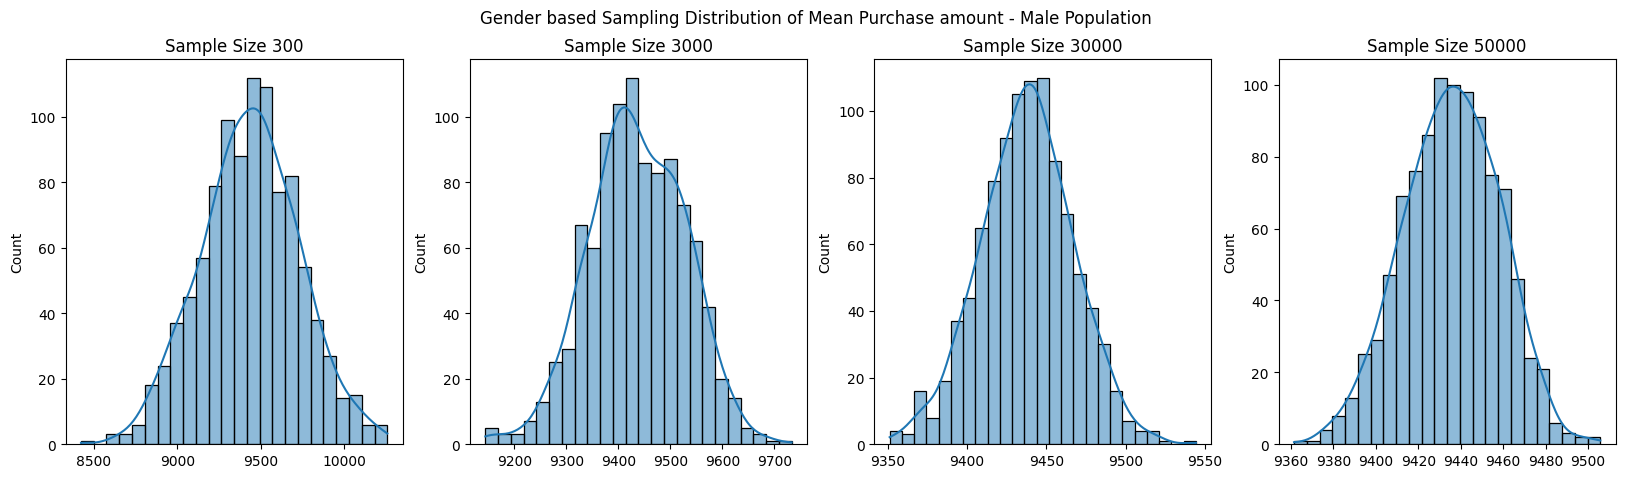

In [36]:
plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
sns.histplot(sample_dist(male_df, 300), kde=True)
plt.title('Sample Size 300')

plt.subplot(1,4,2)
sns.histplot(sample_dist(male_df, 3000), kde=True)
plt.title('Sample Size 3000')

plt.subplot(1,4,3)
sns.histplot(sample_dist(male_df, 30000), kde=True)
plt.title('Sample Size 30000')

plt.subplot(1,4,4)
sns.histplot(sample_dist(male_df, 50000), kde=True)
plt.title('Sample Size 50000')

plt.suptitle("Gender based Sampling Distribution of Mean Purchase amount - Male Population")
plt.show()


Graphical representation of the sampling distribution of different sample sizes in Male Population:
*    As we have noticed in the non graphical analysis, sample size **significantly affects** the sampling distribution. Initially, for small sample size, wideness was **very high** but for higher sample size, the spread had became **narrower**
*   In higher sample size, we can observe that **population mean** for purchase would be close to **9420 to 9460**





# Sampling on Female Population

In [37]:
male_CI = confidence_interval(male_df, 0.95)
female_CI = confidence_interval(female_df, 0.95)
print(f"95% confidence interval for the Male population on entire dataset - {male_CI}")
print(f"95% confidence interval for the female population on entire dataset - {female_CI}")

95% confidence interval for the Male population on entire dataset - (9422.019, 9453.033)
95% confidence interval for the female population on entire dataset - (8709.211, 8759.92)


We have already seen that confidence interval for female population is wider than the male population

In [38]:
#Sampling on the Female population for different sample sizes
sample_sizes = [300, 3000, 30000, 50000] #Samples are given as list

for size in sample_sizes:
  female_sampling = resample(female_df, n_samples= size, replace=True) #Sampling on the male population ##Sample size - 300
  print(f'95% confidence_interval for sample size of {size} in female population - {confidence_interval(female_sampling, 0.95)}')

95% confidence_interval for sample size of 300 in female population - (8381.144, 9403.256)
95% confidence_interval for sample size of 3000 in female population - (8620.198, 8961.156)
95% confidence_interval for sample size of 30000 in female population - (8725.099, 8832.768)
95% confidence_interval for sample size of 50000 in female population - (8701.19, 8784.951)


Below is the result which I got when I analyzed:

*   95% confidence_interval for sample size of **300** in female population - **(8363.476, 9483.111)**
*   95% confidence_interval for sample size of **3000** in female population - **(8662.168, 9011.975)**
*   95% confidence_interval for sample size of **30000** in female population - **(8732.953, 8841.149)**
*   95% confidence_interval for sample size of **50000** in female population - **(8697.84, 8781.241)**

From we observe crucial inferences,
same as male population
1.   As the **sample size** gets **higher & higher**, the confidence interval for the sample is shrinking and **gets close** to population mean.
2.   The wideness between the **lower** and **upper** bound of the CI were also **shrinking** for larger sample sizes
1.   We can also observe that the confidence intervals for are overlapping with each other. For sample size **300**, CI was **very wide** but it shrank for the sample size of **3000** and shrank further for the sample size **30000**, **50000**.
2.   Also, we can witness that atleast the lower bound of the higher samples are coinciding with the confidence interval of the smaller sample sizes



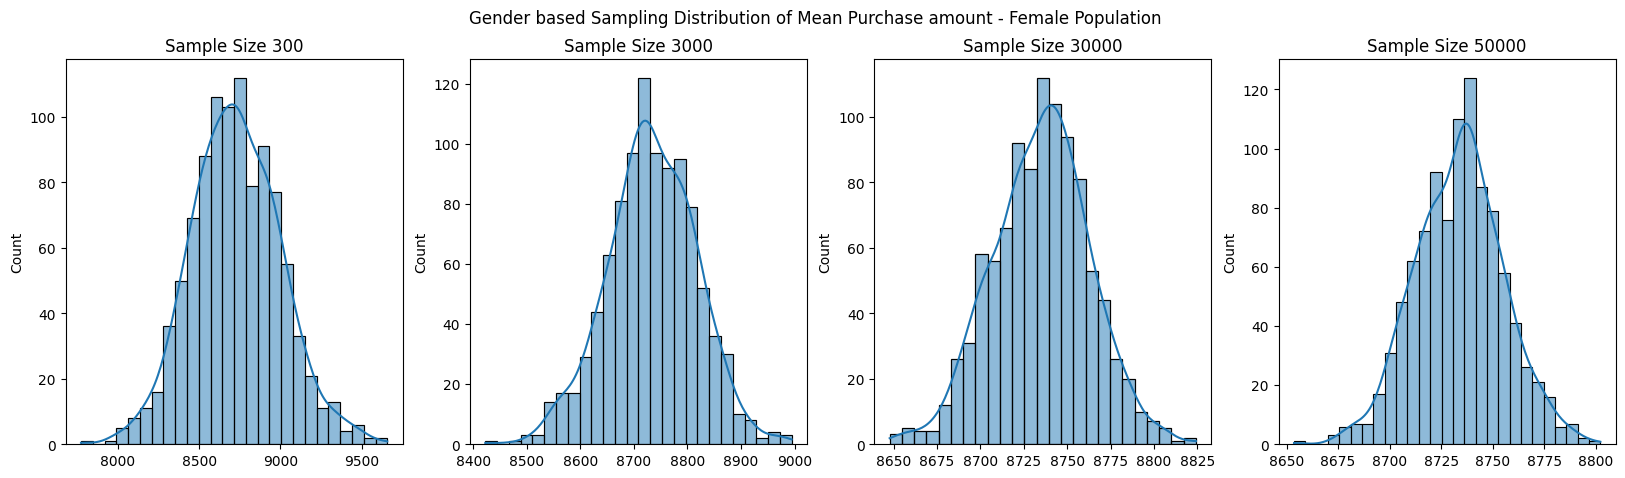

In [39]:
plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
sns.histplot(sample_dist(female_df, 300), kde=True)
plt.title('Sample Size 300')

plt.subplot(1,4,2)
sns.histplot(sample_dist(female_df, 3000), kde=True)
plt.title('Sample Size 3000')

plt.subplot(1,4,3)
sns.histplot(sample_dist(female_df, 30000), kde=True)
plt.title('Sample Size 30000')

plt.subplot(1,4,4)
sns.histplot(sample_dist(female_df, 50000), kde=True)
plt.title('Sample Size 50000')

plt.suptitle("Gender based Sampling Distribution of Mean Purchase amount - Female Population")
plt.show()

Graphical representation of the sampling distribution of different sample sizes in Female Population:
*    As we have noticed in the non graphical analysis, sample size **significantly affects** the sampling distribution. Initially, for small sample size, wideness was **very high** but for higher sample size, the spread had became **narrower**
*   In higher sample size, we can observe that population mean for purchase would be close to **8720 to 8760**





# Insights:
*   We could clearly say that population mean of male and female will be different and male population mean is **significantly higher** than female.
*   **Male Population mean** would be close to **9420 to 9460**
*   **Female Population mean** would be close to **8720 to 8760**
*   Confidence interval for both these population **did not coincide.**
*   And Ofcourse, sampling distribution is also different for both the population





# 5. How does Marital_Status affect the amount spent?

In [40]:
#Creating the seperate dataframes for Single and Married seperately.
single_df = df[df['Marital_Status']== 0 ]
married_df = df[df['Marital_Status']== 1]

In [41]:
single_df.describe()

,Purchase
count,324731.000000
mean,9265.907619
std,5027.347859
min,12.000000
25%,5605.000000
50%,8044.000000
75%,12061.000000
max,23961.000000


In [42]:
married_df.describe()

,Purchase
count,225337.000000
mean,9261.174574
std,5016.897378
min,12.000000
25%,5843.000000
50%,8051.000000
75%,12042.000000
max,23961.000000


# Sampling on Single Population

In [43]:
##Considering the entire dataset as a Sample for the whole population who made purchases in Walmart
#Defining function to calculate confidence interval for the population.
#Required details - Sample mean, t - Value, Standard Error, Standard Deviation


#Confidence interval on Single Population
#confidence_interval(single_df, 0.95)  - Can reuse the function which we created in the above steps

In [44]:
single_CI = confidence_interval(single_df, 0.95)
married_CI = confidence_interval(married_df, 0.95)
print(f"95% confidence interval for the Single population on entire dataset - {single_CI}")
print(f"95% confidence interval for the Married population on entire dataset - {married_CI}")

95% confidence interval for the Single population on entire dataset - (9248.616, 9283.199)
95% confidence interval for the Married population on entire dataset - (9240.46, 9281.889)


Observation:
*   From the above results, we can say that mean purchase amount for **single** population and **married** population could be the same.
*   We could also observe that 95% confidence interval of mean purchase amount for single people is **coincides** with married people. So the population mean for **both single and married** could be the **same**.
*   Confidence interval for single people seems to be **wider** and this could be due to **lesser sample size** than married people.



In [45]:
#Sampling on the Single population for different sample sizes
sample_sizes = [300, 3000, 30000, 50000] #Samples are given as list

for size in sample_sizes:
  single_sampling = resample(single_df, n_samples= size, replace=True) #Sampling on the single population
  print(f'95% confidence_interval for sample size of {size} in single population - {confidence_interval(single_sampling, 0.95)}')

95% confidence_interval for sample size of 300 in single population - (8454.125, 9591.109)
95% confidence_interval for sample size of 3000 in single population - (9061.512, 9416.803)
95% confidence_interval for sample size of 30000 in single population - (9226.144, 9340.09)
95% confidence_interval for sample size of 50000 in single population - (9211.276, 9299.465)


Below is the result which I got when I analyzed:

*   95% confidence_interval for sample size of **300** in Single population - **(9158.705, 10378.115)**
*   95% confidence_interval for sample size of **3000** in Single population - **(9191.196, 9553.439)**
*   95% confidence_interval for sample size of **30000** in Single population - **(9175.94, 9289.399)**
*   95% confidence_interval for sample size of **50000** in Single population - **(9230.44, 9318.98)**

From we observe crucial inferences,
same as our gender based analysis
1.   As the **sample size** gets **higher & higher**, the confidence interval for the sample is shrinking and **gets close** to population mean.
2.   The wideness between the **lower** and **upper** bound of the CI were also **shrinking** for larger sample sizes
1.   We can also observe that the confidence intervals for are overlapping with each other. For sample size **300**, CI was **very wide** but it shrank for the sample size of **3000** and shrank further for the sample size **30000**, **50000**.
2.   Also, we can witness that atleast the lower bound of the higher samples are coinciding with the confidence interval of the smaller sample sizes



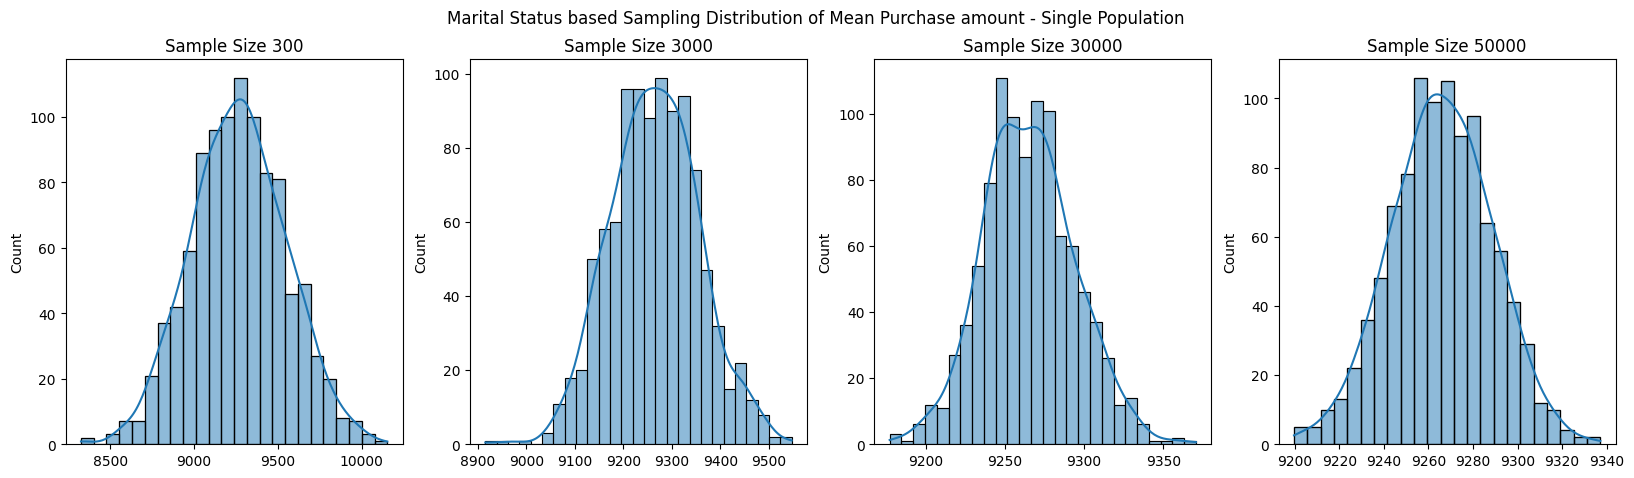

In [46]:
plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
sns.histplot(sample_dist(single_df, 300), kde=True)
plt.title('Sample Size 300')

plt.subplot(1,4,2)
sns.histplot(sample_dist(single_df, 3000), kde=True)
plt.title('Sample Size 3000')

plt.subplot(1,4,3)
sns.histplot(sample_dist(single_df, 30000), kde=True)
plt.title('Sample Size 30000')

plt.subplot(1,4,4)
sns.histplot(sample_dist(single_df, 50000), kde=True)
plt.title('Sample Size 50000')

plt.suptitle("Marital Status based Sampling Distribution of Mean Purchase amount - Single Population")
plt.show()

Graphical representation of the sampling distribution of different sample sizes in Single Population:
*    As we have noticed in the non graphical analysis, sample size **significantly affects** the sampling distribution. Initially, for small sample size, wideness was **very high** but for higher sample size, the spread had became **narrower**
*   In higher sample size, we can observe that population mean for purchase would be close to **9250 to 9300** since the probability for this range is higher.
1.   It is crucial to observe the spread of distrubution, distribution is  properly formed. We will compare it with married population








# Sampling on Married Population

In [47]:
single_CI = confidence_interval(single_df, 0.95)
married_CI = confidence_interval(married_df, 0.95)
print(f"95% confidence interval for the Single population on entire dataset - {single_CI}")
print(f"95% confidence interval for the Married population on entire dataset - {married_CI}")

95% confidence interval for the Single population on entire dataset - (9248.616, 9283.199)
95% confidence interval for the Married population on entire dataset - (9240.46, 9281.889)


In [48]:
#Sampling on the Married population for different sample sizes
sample_sizes = [300, 3000, 30000, 50000] #Samples are given as list

for size in sample_sizes:
  married_sampling = resample(married_df, n_samples= size, replace=True) #Sampling on the married population
  print(f'95% confidence_interval for sample size of {size} in single population - {confidence_interval(married_sampling, 0.95)}')

95% confidence_interval for sample size of 300 in single population - (8966.927, 10089.573)
95% confidence_interval for sample size of 3000 in single population - (9129.244, 9494.975)
95% confidence_interval for sample size of 30000 in single population - (9226.44, 9340.248)
95% confidence_interval for sample size of 50000 in single population - (9218.581, 9306.696)


Below is the result which I got when I analyzed:

*   95% confidence_interval for sample size of **300** in Married population - **(9129.093, 10301.867)**
*   95% confidence_interval for sample size of **3000** in Married population - **(9119.451, 9482.594)**
*   95% confidence_interval for sample size of **30000** in Married population - **(9249.664, 9363.842)**
*   95% confidence_interval for sample size of **50000** in Married population - **(9226.845, 9315.34)**

From we observe crucial inferences,
same as our gender based analysis
1.   As the **sample size** gets **higher & higher**, the confidence interval for the sample is shrinking and **gets close** to population mean.
2.   The wideness between the **lower** and **upper** bound of the CI were also **shrinking** for larger sample sizes
1.   We can also observe that the confidence intervals for are overlapping with each other. For sample size **300**, CI was **very wide** but it shrank for the sample size of **3000** and shrank further for the sample size **30000**, **50000**.
2.   Also, we can witness that atleast the lower bound of the higher samples are coinciding with the confidence interval of the smaller sample sizes



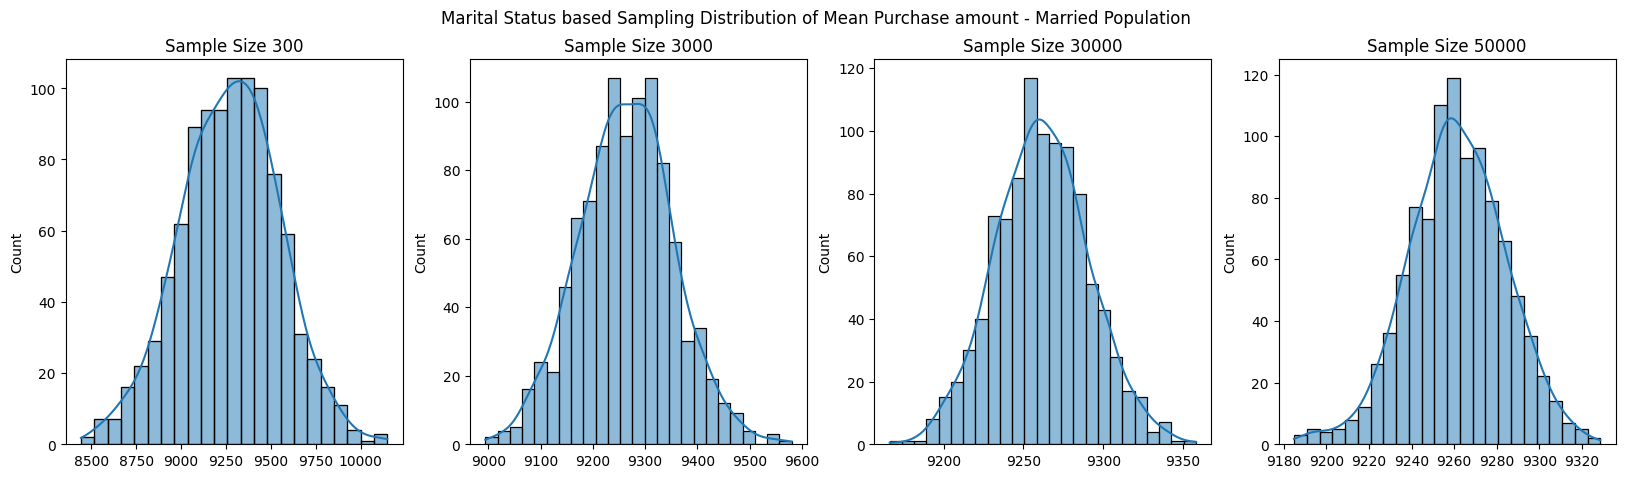

In [49]:
plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
sns.histplot(sample_dist(married_df, 300), kde=True)
plt.title('Sample Size 300')

plt.subplot(1,4,2)
sns.histplot(sample_dist(married_df, 3000), kde=True)
plt.title('Sample Size 3000')

plt.subplot(1,4,3)
sns.histplot(sample_dist(married_df, 30000), kde=True)
plt.title('Sample Size 30000')

plt.subplot(1,4,4)
sns.histplot(sample_dist(married_df, 50000), kde=True)
plt.title('Sample Size 50000')

plt.suptitle("Marital Status based Sampling Distribution of Mean Purchase amount - Married Population")
plt.show()

Graphical representation of the sampling distribution of different sample sizes in Married Population:
*    As we have noticed in the non graphical analysis, sample size **significantly affects** the sampling distribution. Initially, for small sample size, wideness was **very high** but for higher sample size, the spread had became **narrower**
*   In higher sample size, we can observe that population mean for purchase would be close to **9240 to 9280** since the probability for this range is higher.
1.   We can see distribution is properly formed and distribution **looks similar** to single population.



# Insights:

*   We could also observe that 95% confidence interval of mean purchase amount for single people is **coincides** with married people. So the population mean for **both single and married** could be the **same**.
*   And Ofcourse, sampling distribution is also **almost same** for both the population


# 6. How does Age affect the amount spent?

In [50]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [51]:
#Creating the seperate dataframes for Single and Married seperately.
zero_17 = df[df['Age']== '0-17' ]
eighteen_25 = df[df['Age']== '18-25']
twentysix_35 = df[df['Age']== '26-35' ]
thirtysix_45 = df[df['Age']== '36-45' ]
fourtysix_50 = df[df['Age']== '46-50' ]
fiftyone_55 = df[df['Age']== '51-55']
fiftyfive_plus = df[df['Age']== '55+' ]

In [52]:
zero_17_CI = confidence_interval(zero_17, 0.95)
eighteen_25_CI = confidence_interval(eighteen_25, 0.95)
twentysix_35_CI = confidence_interval(twentysix_35, 0.95)
thirtysix_45_CI = confidence_interval(thirtysix_45, 0.95)
fourtysix_50_CI = confidence_interval(fourtysix_50, 0.95)
fiftyone_55_CI = confidence_interval(fiftyone_55, 0.95)
fiftyfive_plus_CI = confidence_interval(fiftyfive_plus, 0.95)

print(f"95% confidence interval for the 0 to 17 population on entire dataset - {zero_17_CI}")
print(f"95% confidence interval for the 18 to 25 population on entire dataset - {eighteen_25_CI}")
print(f"95% confidence interval for the 26 to 35 population on entire dataset - {twentysix_35_CI}")
print(f"95% confidence interval for the 36 to 45 population on entire dataset - {thirtysix_45_CI}")
print(f"95% confidence interval for the 46 to 50 population on entire dataset - {fourtysix_50_CI}")
print(f"95% confidence interval for the 51 to 55 population on entire dataset - {fiftyone_55_CI}")
print(f"95% confidence interval for the 55+ population on entire dataset - {fiftyfive_plus_CI}")



95% confidence interval for the 0 to 17 population on entire dataset - (8851.944, 9014.985)
95% confidence interval for the 18 to 25 population on entire dataset - (9138.408, 9200.919)
95% confidence interval for the 26 to 35 population on entire dataset - (9231.734, 9273.648)
95% confidence interval for the 36 to 45 population on entire dataset - (9301.669, 9361.032)
95% confidence interval for the 46 to 50 population on entire dataset - (9163.084, 9254.167)
95% confidence interval for the 51 to 55 population on entire dataset - (9483.991, 9585.626)
95% confidence interval for the 55+ population on entire dataset - (9269.297, 9403.264)


Observation:
*   From the above results, we can say that** mean purchase amount** for people in 0 to 17 age group is **lesser** than other age group
*   In population, **Average purchases** made by people in **51 to 55** age group would be **higher** than others. Because lower bound is way higher than most of the upper bounds. Also, confidence interval for this group did not coincides with other age group
*   Observe Confidence Interval for **26 to 35** age group, the wideness is **narrower** than others. This is because we have very large population in that age group.
*   Also, Observe Confidence Interval for **0 to 17** and **55+** age group are **significantly wider** than others. This is because we have **very less population** in those age group.
*   **Overlapping** of confidence interval among different age groups:
    1.   Confidence interval for **'0 to 17'** and **'51 to 55'** age group **does not** overlap with any other age groups.
    2.   Confidence interval for **18 to 25** and **46 to 50** age group **strongly overlap** with each other.
    1.  Confidence interval for **36 to 45** and **55+** age group also **strongly overlap** with each other.
    1.   Confidence interval for **26 to 35** and **46 to 50** age group **overlap** with each other.
    1.   Confidence interval for **26 to 35** and **55+** age group **barely overlap** with each other.


# Sampling on the Age groups

In [53]:
#Taking back the dataframes which we used before

zero_17 = df[df['Age']== '0-17' ]
eighteen_25 = df[df['Age']== '18-25']
twentysix_35 = df[df['Age']== '26-35' ]
thirtysix_45 = df[df['Age']== '36-45' ]
fourtysix_50 = df[df['Age']== '46-50' ]
fiftyone_55 = df[df['Age']== '51-55']
fiftyfive_plus = df[df['Age']== '55+' ]

**Sampling on the different Age group for different sample sizes**

##**Sampling on 0 to 17 Age Group**

In [54]:
sample_sizes = [300, 3000, 30000, 50000] #Samples are given as list

#Sampling on 0 to 17 Age Group:
for size in sample_sizes:
  zero_17_sampling = resample(zero_17, n_samples= size, replace=True) #Sampling on 0 to 17 Age group
  print(f'95% confidence_interval for sample size of {size} in 0 to 17 Age group - {confidence_interval(zero_17_sampling, 0.95)}')

95% confidence_interval for sample size of 300 in 0 to 17 Age group - (9086.616, 10312.337)
95% confidence_interval for sample size of 3000 in 0 to 17 Age group - (8705.402, 9074.36)
95% confidence_interval for sample size of 30000 in 0 to 17 Age group - (8836.574, 8952.105)
95% confidence_interval for sample size of 50000 in 0 to 17 Age group - (8887.846, 8977.909)


**Insights: 0 to 17 Age group**

Below is the result which I got when I analyzed:

*   95% confidence_interval for sample size of **300** in **0 to 17** Age group - **(8197.119, 9335.595)**
*   95% confidence_interval for sample size of **3000** in **0 to 17** Age group - **(8689.373, 9055.375)**
*   95% confidence_interval for sample size of **30000** in **0 to 17** Age group - **(8855.203, 8970.709)**
*   95% confidence_interval for sample size of **50000** in **0 to 17** Age group - **(8880.298, 8970.02)**


From the result we can observe crucial inferences,
same as our gender based analysis
1.   As the **sample size** gets **higher & higher**, the confidence interval for the sample is shrinking and **gets close** to population mean.
2.   The wideness between the **lower** and **upper** bound of the CI were also **shrinking** for larger sample sizes
1.   We can also observe that the confidence intervals for are overlapping with each other. For sample size **300**, CI was **very wide** but it shrank for the sample size of **3000** and shrank further for the sample size **30000** and **50000**.
2.   Also, we can witness that atleast the lower bound of the higher samples are coinciding with the confidence interval of the smaller sample sizes


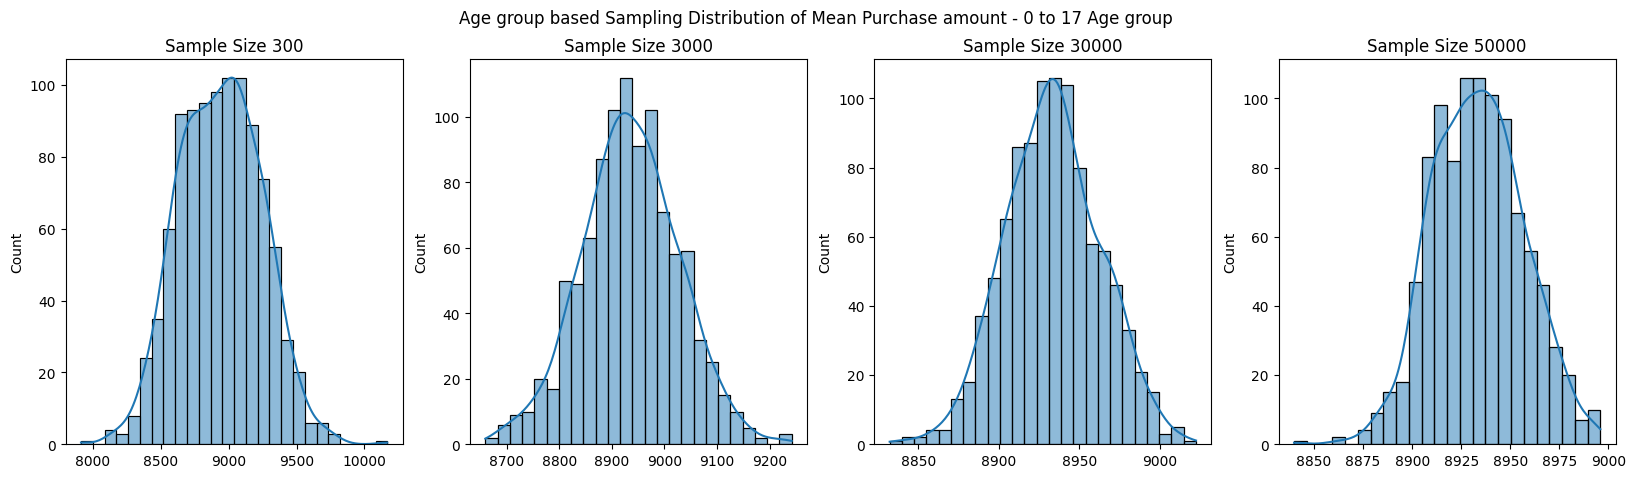

In [55]:
plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
sns.histplot(sample_dist(zero_17, 300), kde=True)
plt.title('Sample Size 300')

plt.subplot(1,4,2)
sns.histplot(sample_dist(zero_17, 3000), kde=True)
plt.title('Sample Size 3000')

plt.subplot(1,4,3)
sns.histplot(sample_dist(zero_17, 30000), kde=True)
plt.title('Sample Size 30000')

plt.subplot(1,4,4)
sns.histplot(sample_dist(zero_17, 50000), kde=True)
plt.title('Sample Size 50000')

plt.suptitle("Age group based Sampling Distribution of Mean Purchase amount - 0 to 17 Age group")
plt.show()

Graphical representation of the sampling distribution of different sample sizes in 0 to 17 age group:
*    As we have noticed in the non graphical analysis, sample size **significantly affects** the sampling distribution. Initially, for small sample size, wideness was **very high** but for higher sample size, the spread had became **narrower**
*   In higher sample size, we can observe that population mean for purchase would be close to **8920 to 8960** since the probability for this range is higher.




##**Sampling on 18 to 25 Age Group**

In [56]:
sample_sizes = [300, 3000, 30000, 50000] #Samples are given as list

#Sampling on 18 to 25 Age Group:
for size in sample_sizes:
  eighteen_25_sampling = resample(eighteen_25, n_samples= size, replace=True) #Sampling on the 18 TO 25 Age group
  print(f'95% confidence_interval for sample size of {size} in 18 to 25 Age group - {confidence_interval(eighteen_25_sampling, 0.95)}')

95% confidence_interval for sample size of 300 in 18 to 25 Age group - (8562.086, 9690.334)
95% confidence_interval for sample size of 3000 in 18 to 25 Age group - (8996.778, 9356.421)
95% confidence_interval for sample size of 30000 in 18 to 25 Age group - (9091.066, 9205.489)
95% confidence_interval for sample size of 50000 in 18 to 25 Age group - (9106.465, 9194.528)


**Insights: 18 to 25 Age group**

Below is the result which I got when I analyzed:

*   95% confidence_interval for sample size of **300 in 18 to 25** Age group - **(9079.474, 10300.813)**
*   95% confidence_interval for sample size of **3000 in 18 to 25** Age group - **(8966.173, 9320.643)**
*   95% confidence_interval for sample size of **30000 in 18 to 25** Age group - **(9095.43, 9209.265)**
*   95% confidence_interval for sample size of **50000 in 18 to 25** Age group - **(9094.765, 9182.766)**

From the result we can observe crucial inferences,
same as our gender based analysis
1.   As the **sample size** gets **higher & higher**, the confidence interval for the sample is **shrinking** and **gets close** to population mean.
2.   The wideness between the **lower** and **upper** bound of the CI were also **shrinking** for larger sample sizes
1.   We can also observe that the confidence intervals for are overlapping with each other. For sample size **300**, CI was **very wide** but it shrank for the sample size of **3000** and shrank further for the sample size **30000** and **50000**.
2.   Also, we can witness that atleast the lower bound of the higher samples are coinciding with the confidence interval of the smaller sample sizes
1.   Confidence interval of 18 to 25 age group **does not coincides or overlaps** with 0 to 17 age group.





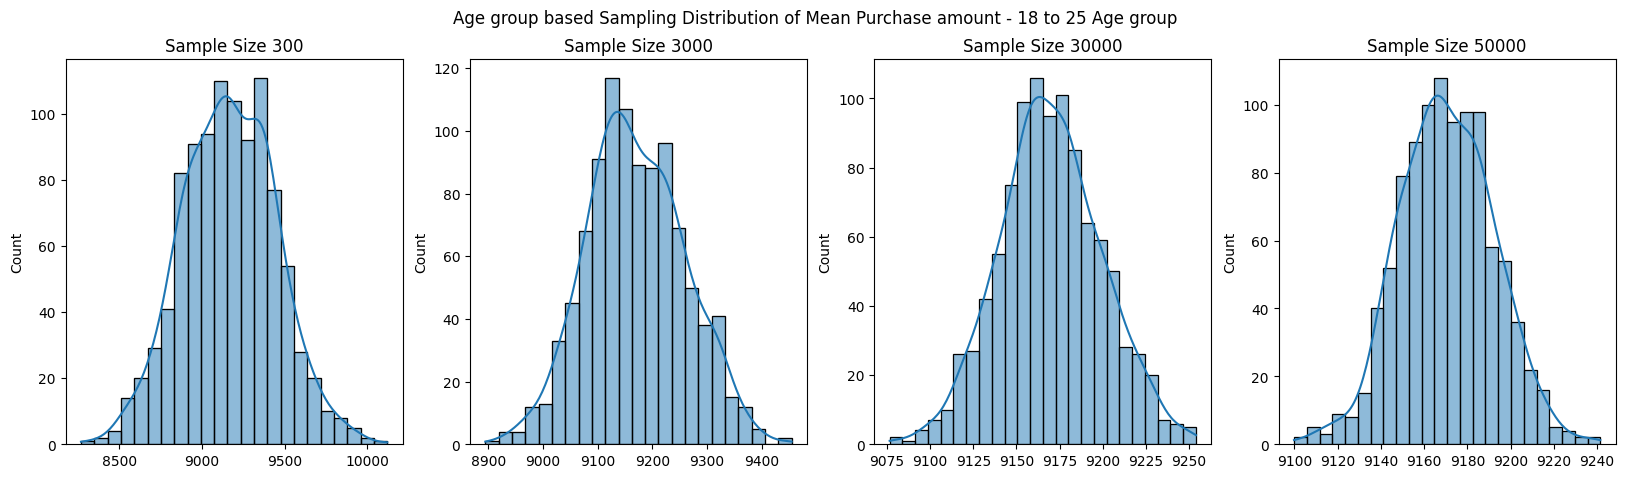

In [57]:
plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
sns.histplot(sample_dist(eighteen_25, 300), kde=True)
plt.title('Sample Size 300')

plt.subplot(1,4,2)
sns.histplot(sample_dist(eighteen_25, 3000), kde=True)
plt.title('Sample Size 3000')

plt.subplot(1,4,3)
sns.histplot(sample_dist(eighteen_25, 30000), kde=True)
plt.title('Sample Size 30000')

plt.subplot(1,4,4)
sns.histplot(sample_dist(eighteen_25, 50000), kde=True)
plt.title('Sample Size 50000')

plt.suptitle("Age group based Sampling Distribution of Mean Purchase amount - 18 to 25 Age group")
plt.show()

Graphical representation of the sampling distribution of different sample sizes in 18 to 25 age group:
*   In higher sample size, we can observe that population mean for purchase would be close to **9125 to 9225** since the probability for this range is higher and we can see distribution is **properly** formed.

## **Sampling on 26 to 35 Age Group**

In [58]:
sample_sizes = [300, 3000, 30000, 50000] #Samples are given as list

#Sampling on 26 to 35 Age Group:
for size in sample_sizes:
  twentysix_35_sampling = resample(twentysix_35, n_samples= size, replace=True) #Sampling on the 26 to 35 Age group
  print(f'95% confidence_interval for sample size of {size} in 26 to 35 Age group - {confidence_interval(twentysix_35_sampling, 0.95)}')

95% confidence_interval for sample size of 300 in 26 to 35 Age group - (8615.078, 9739.382)
95% confidence_interval for sample size of 3000 in 26 to 35 Age group - (9191.764, 9552.469)
95% confidence_interval for sample size of 30000 in 26 to 35 Age group - (9264.036, 9378.343)
95% confidence_interval for sample size of 50000 in 26 to 35 Age group - (9216.369, 9304.167)


**Insights: 26 to 35 Age group**

Below is the result which I got when I analyzed:

*   95% confidence_interval for sample size of **300 in 26 to 35** Age group - **(8265.612, 9410.648)**
*   95% confidence_interval for sample size of **3000 in 26 to 35** Age group - **(9240.057, 9605.877)**
*   95% confidence_interval for sample size of **30000 in 26 to 35** Age group - **(9225.939, 9339.218)**
*   95% confidence_interval for sample size of **50000 in 26 to 35** Age group - **(9199.195, 9286.809)**

From the result we can observe crucial inferences,
same as our gender based analysis
1.   As the **sample size** gets **higher & higher**, the confidence interval for the sample is **shrinking** and **gets close** to population mean. For the sample size of 30000, 50000, confidence interval is **much narrower** whereas other sample sizes are **more wider**
2.   The wideness between the **lower** and **upper** bound of the CI were **significantly shrinked** for larger sample sizes
1.   We can also observe that the confidence intervals for are overlapping with each other. For sample size **300**, CI was **very wide** but it shrank for the sample size of **3000** and shrank further for the sample size **30000** and **50000**.
2.   Also, we can witness that atleast the lower bound of the higher samples are coinciding with the confidence interval of the smaller sample sizes
1.   Confidence interval of **26 to 35** age group **does not coincides or overlaps** with 0 to 17 age group or 18 to 25 age group.





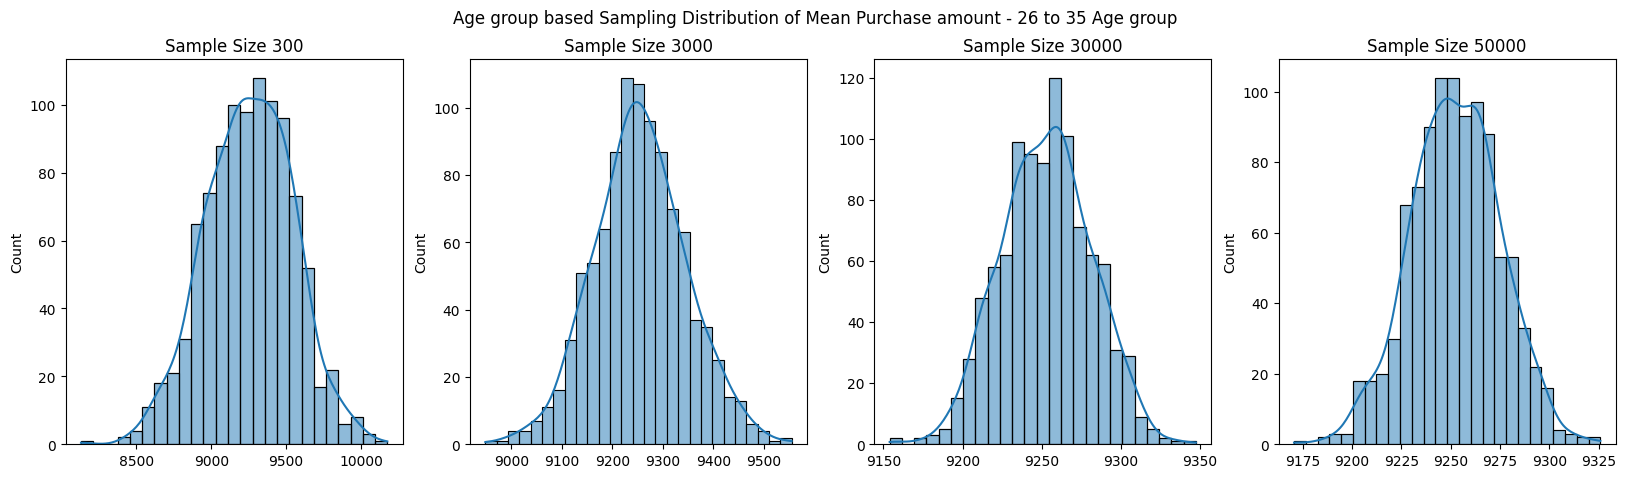

In [59]:
plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
sns.histplot(sample_dist(twentysix_35, 300), kde=True)
plt.title('Sample Size 300')

plt.subplot(1,4,2)
sns.histplot(sample_dist(twentysix_35, 3000), kde=True)
plt.title('Sample Size 3000')

plt.subplot(1,4,3)
sns.histplot(sample_dist(twentysix_35, 30000), kde=True)
plt.title('Sample Size 30000')

plt.subplot(1,4,4)
sns.histplot(sample_dist(twentysix_35, 50000), kde=True)
plt.title('Sample Size 50000')

plt.suptitle("Age group based Sampling Distribution of Mean Purchase amount - 26 to 35 Age group")
plt.show()

Graphical representation of the sampling distribution of different sample sizes in  26 to 35 age group:
*   In higher sample size, we can observe that population mean for purchase would be close to **9220 to 9300** since the probability for this range is higher and we can see distribution is properly formed.

## **Sampling on 36 to 45 Age Group**

In [60]:
thirtysix_45 = df[df['Age']== '36-45' ]
fourtysix_50 = df[df['Age']== '46-50' ]
fiftyone_55 = df[df['Age']== '51-55']
fiftyfive_plus = df[df['Age']== '55+' ]

In [61]:
sample_sizes = [300, 3000, 30000, 50000] #Samples are given as list

#Sampling on 36 to 45 Age Group:
for size in sample_sizes:
  thirtysix_45_sampling = resample(thirtysix_45, n_samples= size, replace=True) #Sampling on the 36 to 45 Age group
  print(f'95% confidence_interval for sample size of {size} in 36 to 45 Age group - {confidence_interval(thirtysix_45_sampling, 0.95)}')

95% confidence_interval for sample size of 300 in 36 to 45 Age group - (8751.628, 9864.012)
95% confidence_interval for sample size of 3000 in 36 to 45 Age group - (9279.731, 9641.733)
95% confidence_interval for sample size of 30000 in 36 to 45 Age group - (9305.275, 9418.674)
95% confidence_interval for sample size of 50000 in 36 to 45 Age group - (9230.661, 9318.072)


**Insights: 36 to 45 Age group**

Below is the result which I got when I analyzed:

*   95% confidence_interval for sample size of **300 in  36 to 45** Age group - **(8976.391, 10072.129)**
*   95% confidence_interval for sample size of **3000 in  36 to 45** Age group - **(9073.437, 9427.899)**
*   95% confidence_interval for sample size of **30000 in 36 to 45** Age group - **(9308.295, 9422.638)**
*   95% confidence_interval for sample size of **50000 in 36 to 45** Age group - **(9300.395, 9388.209)**

From the result we can observe crucial inferences,
same as our gender based analysis
1.   As the **sample size** gets **higher & higher**, the confidence interval for the sample is **shrinking** and **gets close** to population mean. For the sample size of 30000, 50000, confidence interval is **much narrower** whereas other sample sizes are **more wider**
2.   The wideness between the **lower** and **upper** bound of the CI were **significantly shrinked** for larger sample sizes
1.   We can also observe that the confidence intervals for are overlapping with each other. For sample size **300**, CI was **very wide** but it shrank for the sample size of **3000** and shrank further for the sample size **30000** and **50000**.
2.   Also, we can witness that atleast the lower bound of the higher samples are coinciding with the confidence interval of the smaller sample sizes
1.   Confidence interval of **36 to 45** age group **does not coincides or overlaps** with **0 to 17 or 18 to 25 or 26 to 35** age group.

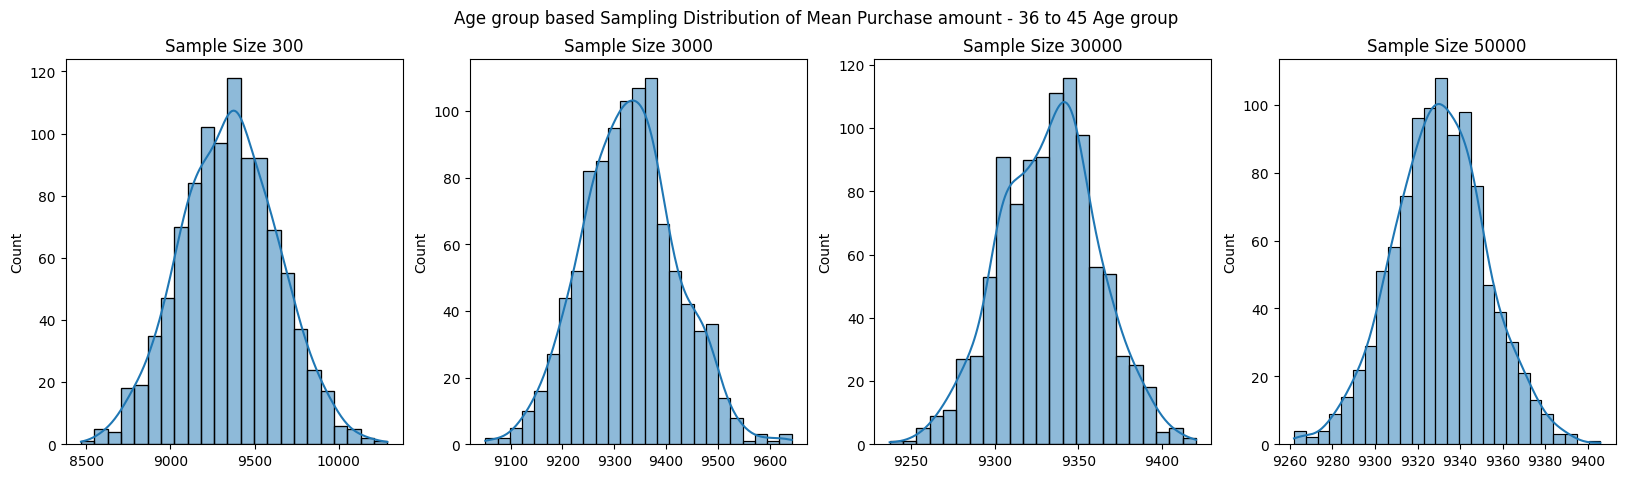

In [62]:
plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
sns.histplot(sample_dist(thirtysix_45, 300), kde=True)
plt.title('Sample Size 300')

plt.subplot(1,4,2)
sns.histplot(sample_dist(thirtysix_45, 3000), kde=True)
plt.title('Sample Size 3000')

plt.subplot(1,4,3)
sns.histplot(sample_dist(thirtysix_45, 30000), kde=True)
plt.title('Sample Size 30000')

plt.subplot(1,4,4)
sns.histplot(sample_dist(thirtysix_45, 50000), kde=True)
plt.title('Sample Size 50000')

plt.suptitle("Age group based Sampling Distribution of Mean Purchase amount - 36 to 45 Age group")
plt.show()

Graphical representation of the sampling distribution of different sample sizes in 36 to 45 age group:
*   In higher sample size, we can observe that population mean for purchase would be close to **9280 to 9380** since the probability for this range is higher and we can see distribution is properly formed.

## **Sampling on 46 to 50 Age Group**

In [63]:
sample_sizes = [300, 3000, 30000, 50000] #Samples are given as list

#Sampling on 46 to 50 Age Group:
for size in sample_sizes:
  fourtysix_50_sampling = resample(fourtysix_50, n_samples= size, replace=True) #Sampling on the 46 to 50 Age group
  print(f'95% confidence_interval for sample size of {size} in  46 to 50 Age group - {confidence_interval(fourtysix_50_sampling, 0.95)}')

95% confidence_interval for sample size of 300 in  46 to 50 Age group - (8320.828, 9409.545)
95% confidence_interval for sample size of 3000 in  46 to 50 Age group - (9195.156, 9554.4)
95% confidence_interval for sample size of 30000 in  46 to 50 Age group - (9169.556, 9282.603)
95% confidence_interval for sample size of 50000 in  46 to 50 Age group - (9187.381, 9274.269)


**Insights: 46 to 50 Age group**

Below is the result which I got when I analyzed:
*   95% confidence_interval for sample size of **300 in  46 to 50** Age group - **(8537.043, 9604.371)**
*   95% confidence_interval for sample size of **3000 in  46 to 50** Age group - **(8955.846, 9313.16)**
*   95% confidence_interval for sample size of **30000 in  46 to 50** Age group - **(9186.897, 9299.376)**
*   95% confidence_interval for sample size of **50000 in  46 to 50** Age group - **(9133.846, 9220.753)**

From the result we can observe crucial inferences,
same as our gender based analysis
1.   As the **sample size** gets **higher & higher**, the confidence interval for the sample is **shrinking** and **gets close** to population mean. For the sample size of 30000, 50000, confidence interval is **much narrower** whereas other sample sizes are **more wider**
2.   The wideness between the **lower** and **upper** bound of the CI were **significantly shrinked** for larger sample sizes
1.   We can also observe that the confidence intervals for are overlapping with each other. For sample size **300**, CI was **very wide** but it shrank for the sample size of **3000** and shrank further for the sample size **30000** and **50000**.
2.   Also, we can witness that atleast the lower bound of the higher samples are coinciding with the confidence interval of the smaller sample sizes
1.   Confidence interval of **46 to 50** age group **does not coincides or overlaps** with **0 to 17 or 26 to 35 or 36 to 50** age group. But it **strongly overlaps** with **18 to 25** age group., which we also notice when we analysis confidence interval for **entire data set**.

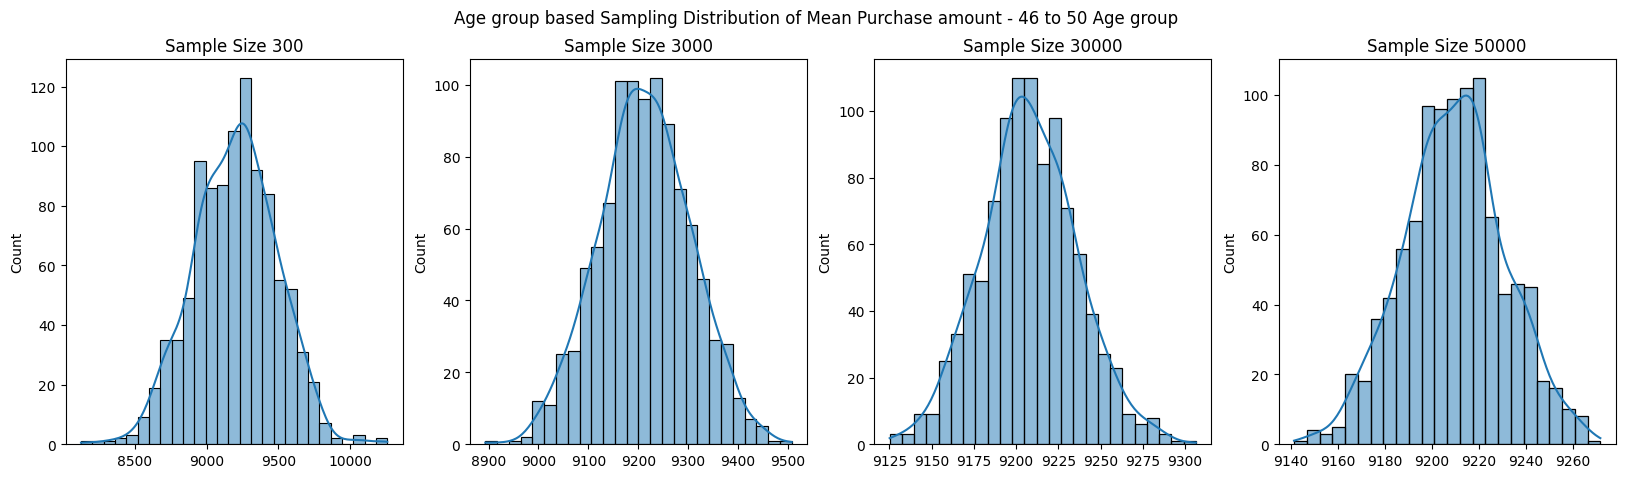

In [64]:
plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
sns.histplot(sample_dist(fourtysix_50, 300), kde=True)
plt.title('Sample Size 300')

plt.subplot(1,4,2)
sns.histplot(sample_dist(fourtysix_50, 3000), kde=True)
plt.title('Sample Size 3000')

plt.subplot(1,4,3)
sns.histplot(sample_dist(fourtysix_50, 30000), kde=True)
plt.title('Sample Size 30000')

plt.subplot(1,4,4)
sns.histplot(sample_dist(fourtysix_50, 50000), kde=True)
plt.title('Sample Size 50000')

plt.suptitle("Age group based Sampling Distribution of Mean Purchase amount - 46 to 50 Age group")
plt.show()

Graphical representation of the sampling distribution of different sample sizes in  26 to 35 age group:
*   In higher sample size, we can observe that population mean for purchase would be close to **9160 to 9260** since the probability for this range is higher and we can see distribution is properly formed.

## **Sampling on 51 to 55 Age Group**

In [65]:
sample_sizes = [300, 3000, 30000, 50000] #Samples are given as list

#Sampling on  51 to 55 Age Group:
for size in sample_sizes:
  fiftyone_55_sampling = resample(fiftyone_55, n_samples= size, replace=True) #Sampling on the  51 to 55 Age group
  print(f'95% confidence_interval for sample size of {size} in  51 to 55 Age group - {confidence_interval(fiftyone_55_sampling, 0.95)}')

95% confidence_interval for sample size of 300 in  51 to 55 Age group - (8884.44, 10035.686)
95% confidence_interval for sample size of 3000 in  51 to 55 Age group - (9390.637, 9750.027)
95% confidence_interval for sample size of 30000 in  51 to 55 Age group - (9531.036, 9647.141)
95% confidence_interval for sample size of 50000 in  51 to 55 Age group - (9535.841, 9625.158)


**Insights: 51 to 55 Age group**

Below is the result which I got when I analyzed:
*   95% confidence_interval for sample size of **300 in  51 to 55** Age group - **(9161.252, 10383.162)**
*   95% confidence_interval for sample size of **3000 in  51 to 55** Age group - **(9448.1, 9812.366)**
*   95% confidence_interval for sample size of **30000 in  51 to 55** Age group - **(9481.419, 9596.616)**
*   95% confidence_interval for sample size of **50000 in  51 to 55** Age group - **(9429.321, 9517.794)**

From the result we can observe crucial inferences,
same as our gender based analysis
1.   As the **sample size** gets **higher & higher**, the confidence interval for the sample is **shrinking** and **gets close** to population mean. For the sample size of 30000, 50000, confidence interval is **much narrower** whereas other sample sizes are **more wider**
2.   The wideness between the **lower** and **upper** bound of the CI were **significantly shrinked** for larger sample sizes
1.   We can also observe that the confidence intervals for are overlapping with each other. For sample size **300**, CI was **very wide** but it shrank for the sample size of **3000** and shrank further for the sample size **30000** and **50000**.
2.   Also, we can witness that atleast the lower bound of the higher samples are coinciding with the confidence interval of the smaller sample sizes
1.   Confidence interval of **51 to 55** age group **does not coincides or overlaps** with any other age group so far.

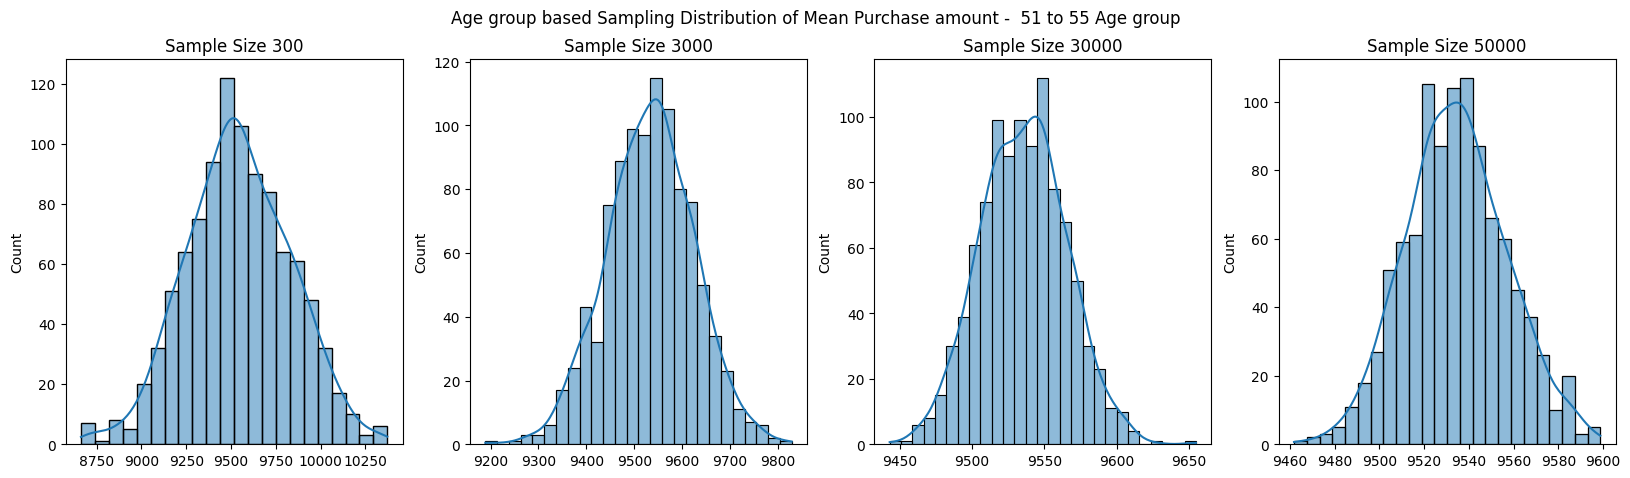

In [66]:
plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
sns.histplot(sample_dist(fiftyone_55, 300), kde=True)
plt.title('Sample Size 300')

plt.subplot(1,4,2)
sns.histplot(sample_dist(fiftyone_55, 3000), kde=True)
plt.title('Sample Size 3000')

plt.subplot(1,4,3)
sns.histplot(sample_dist(fiftyone_55, 30000), kde=True)
plt.title('Sample Size 30000')

plt.subplot(1,4,4)
sns.histplot(sample_dist(fiftyone_55, 50000), kde=True)
plt.title('Sample Size 50000')

plt.suptitle("Age group based Sampling Distribution of Mean Purchase amount -  51 to 55 Age group")
plt.show()

Graphical representation of the sampling distribution of different sample sizes in  45 to 50 age group:
*   In higher sample size, we can observe that population mean for purchase would be close to **9480 to 9580** since the probability for this range is higher and we can see distribution is properly formed.

## **Sampling on 55+ Age Group**

In [67]:
sample_sizes = [300, 3000, 30000, 50000] #Samples are given as list

#Sampling on 55+ Age Group:
for size in sample_sizes:
  fiftyfive_plus_sampling = resample(fiftyfive_plus, n_samples= size, replace=True) #Sampling on the 55+ Age group
  print(f'95% confidence_interval for sample size of {size} in 55+ Age group - {confidence_interval(fiftyfive_plus_sampling, 0.95)}')

95% confidence_interval for sample size of 300 in 55+ Age group - (8794.764, 9954.43)
95% confidence_interval for sample size of 3000 in 55+ Age group - (9193.429, 9547.748)
95% confidence_interval for sample size of 30000 in 55+ Age group - (9272.859, 9386.228)
95% confidence_interval for sample size of 50000 in 55+ Age group - (9262.589, 9350.366)


**Insights: 55+ Age group**

Below is the result which I got when I analyzed:
*   95% confidence_interval for sample size of **300 in 55+** Age group - **(8631.877, 9831.669)**
*   95% confidence_interval for sample size of **3000 in 55+** Age group - **(9191.905, 9549.798)**
*   95% confidence_interval for sample size of **30000 in 55+** Age group - **(9244.186, 9357.731)**
*   95% confidence_interval for sample size of **50000 in 55+** Age group - **(9271.462, 9359.231)**

From the result we can observe crucial inferences,
same as our gender based analysis
1.   As the **sample size** gets **higher & higher**, the confidence interval for the sample is **shrinking** and **gets close** to population mean. For the sample size of 30000, 50000, confidence interval is **much narrower** whereas other sample sizes are **more wider**
2.   The wideness between the **lower** and **upper** bound of the CI were **significantly shrinked** for larger sample sizes
1.   We can also observe that the confidence intervals for are overlapping with each other. For sample size **300**, CI was **very wide** but it shrank for the sample size of **3000** and shrank further for the sample size **30000** and **50000**.
2.   Also, we can witness that atleast the lower bound of the higher samples are coinciding with the confidence interval of the smaller sample sizes
1.   Confidence interval of **55+** age group **strongly overlaps** with **36 to 50** age group but **does not coincides or overlaps** with any other age group which we also observed when we analysis entire dataset.

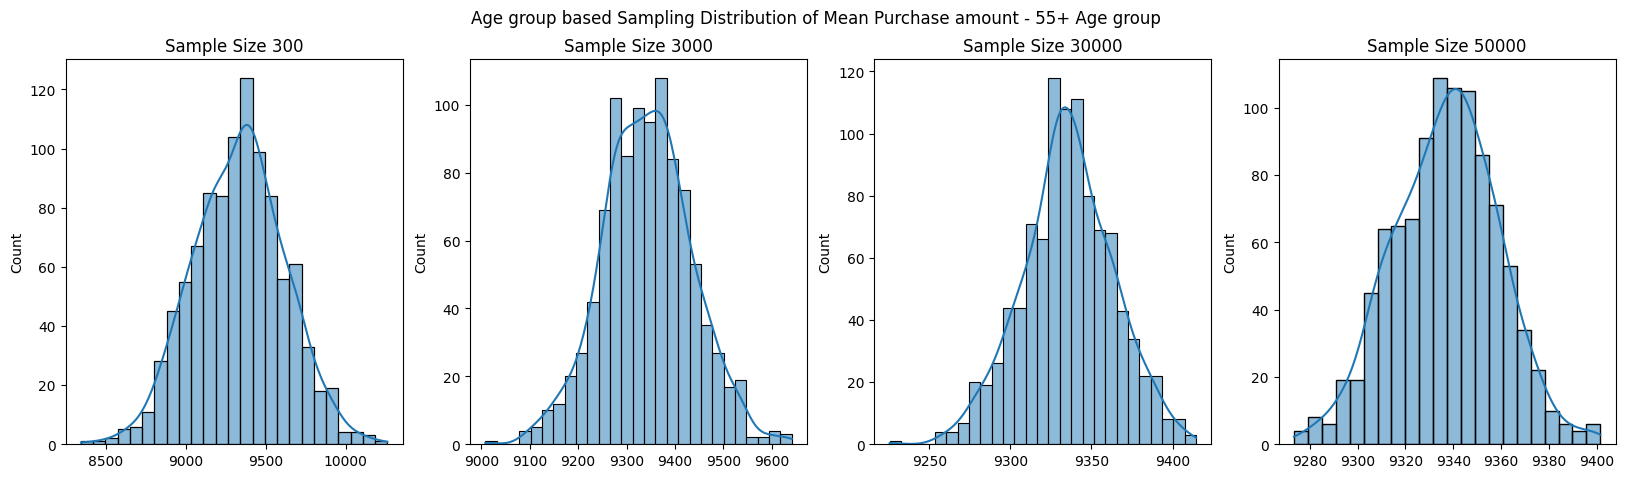

In [68]:
plt.figure(figsize = (20,5))
plt.subplot(1,4,1)
sns.histplot(sample_dist(fiftyfive_plus, 300), kde=True)
plt.title('Sample Size 300')

plt.subplot(1,4,2)
sns.histplot(sample_dist(fiftyfive_plus, 3000), kde=True)
plt.title('Sample Size 3000')

plt.subplot(1,4,3)
sns.histplot(sample_dist(fiftyfive_plus, 30000), kde=True)
plt.title('Sample Size 30000')

plt.subplot(1,4,4)
sns.histplot(sample_dist(fiftyfive_plus, 50000), kde=True)
plt.title('Sample Size 50000')

plt.suptitle("Age group based Sampling Distribution of Mean Purchase amount - 55+ Age group")
plt.show()

Graphical representation of the sampling distribution of different sample sizes in  55+ age group:
*   In higher sample size, we can observe that population mean for purchase would be close to **9280 to 9380** since the probability for this range is higher and we can see distribution is properly formed.

# Report on Gender Analysis:

1.   During Black Friday sale, average amount spent by **Male** is **significantly higher** than the average amount spent by **Female** population.
1.   95% Confidence interval on entire dataset for *Male* - **[9422.019, 9453.033]** and for *Female*  - **[8709.211, 8759.92]**
1.   95% Confidence interval computed using bootstraping for *Male* - **[9402.592, 9492.227]** and for *Female* - **[8697.84, 8781.241]**
2.   Average spending of both these population **did not overlap** with each other.
2.   It suggests that significant **difference** in spending behavior **between the two genders**.




# Report on Marital Status Analysis:

1.   During Black Friday sale, average amount spent by **Single** has **no significantly difference** than the average amount spent by **Married** population.
1.   95% Confidence interval on entire dataset for *Single* - **[9248.616, 9283.199]** and for *Married*  - **[9240.46, 9281.889]**
1.   95% Confidence interval computed using bootstraping for *Single* - **[9224.013, 9312.173]** and for *Married* - **[9226.845, 9315.34]**
2.   Average spending of both these population **strongly overlaps** with each other.
2.   It suggests that significant **no difference** in spending behavior **between the single and married** population.




# Report on Age Analysis:

1.   During Black Friday sale, average amount spent by **Single** has **no significantly difference** than the average amount spent by **Married** population.
1.   95% Confidence interval on entire dataset for *0 to 17* - **[8851.944, 9014.985]** , for *18 to 25*  - **[9138.408, 9200.919]**,for *26 to 35*  - **[9231.734, 9273.648]**, for *36 to 45*  - **[9301.669, 9361.032]**, for *46 to 50*  - **[9163.084, 9254.167]**, for *50 to 55*  - **[9483.991, 9585.626]**, for *55+*  - **[9269.297, 9403.264]**
1.   95% Confidence interval computed using bootstraping for  *0 to 17* - **[8880.298, 8970.02]** , for *18 to 25*  - **[9094.765, 9182.766]**,for *26 to 35*  - **[9199.195, 9286.809]**, for *36 to 45*  - **[9300.395, 9388.209]**, for *46 to 50*  - **[9133.846, 9220.753]**, for *50 to 55*  - **[9429.321, 9517.794]**, for *55+*  - **[9271.462, 9359.231]**
2.  **Overlapping** of confidence interval among different age groups:
    1.   Confidence interval for **'0 to 17'** and **'51 to 55'** age group **does not** overlap with any other age groups.
    2.   Confidence interval for **18 to 25** and **46 to 50** age group **strongly overlap** with each other.
    1.  Confidence interval for **36 to 45** and **55+** age group also **strongly overlap** with each other.
    1.   Confidence interval for **26 to 35** and **46 to 50** age group **overlap** with each other.
    1.   Confidence interval for **26 to 35** and **55+** age group **barely overlap** with each other.Confidence interval for '0 to 17' and '51 to 55' age group does not overlap with any other age groups.

2.   It suggests that considerable **difference / No overlapping** in spending behavior among some age groups and **no difference/ Overlapping** among some age groups.


#Recommendations:

1.   **Personalized marketing:**
  *   Walmart has to come up with gender specific targeted promotion to promote sale. As we have analysed that Male spent more than Females, high value products should be targeted to Male population more.
  *   Come up with targeted marketing to targeted population. For examples, if introducing any products to specific age group, marital status or Gender, promote more specifically to them.
  *   Different age group exhibited different spending patterns and some overlaps too. Create a customer base with all the data collected in the analysis.
1.   **Product Inventory:**
  *   Since spending habits vary among gender and different age groups. Prepare and prioritize the inventory which major population wants. For example, We know that Male population purchase more than Females. During the sale season, prepare the stock inventory effectively and store male goods more.
2.  **Enhancing customer experience**:
  *   Knowing the customer basic information, needs and the demographics, suggest the more appropriate products in online and offline stores.
  *   Suggest more gender specifice, age specific, Marital Status specific products which will boost the sales and enhance the customer satisfaction.
2.   **Pricing and Retention**
  *   Implement dynamic pricing model to vary the price according to the demographics we created. Provide promotional and loyalty programs to retain the high spending customers.
1.   **Feedback:**
  *   Collect feedback from the customers and store them according to their demographics to understand the demographics better and to improve product suggestion, sales and customer satisfaction.









In [69]:
####
